## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [34]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
import math
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MSE
    """
    if isinstance(y, (list, np.ndarray)):
        return np.sum(np.power((y - yp), 2))  / len(y)
    else:
        return math.pow((y - yp), 2)

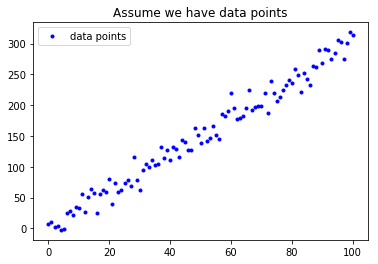

In [36]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

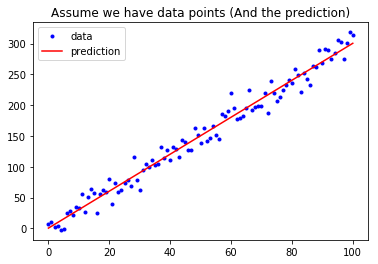

In [37]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [38]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 190.573
The Mean absolute error is 11.193


In [ ]:
# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

    這也是為甚麼，這組資料會被放在Kaggle，請容許我節錄Dataset Description:
    This freely available dataset is provided to the global research comm:unity to apply recent advances in natural language      processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious           disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature,     making it difficult for the medical research community to keep up.

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

    The White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19)

3. 蒐集而來的資料型態為何

    JSON、CSV

4. 這組資料想解決的問題如何評估

    透過資料的分析發現過去有某些現象之關聯，以此建立模型來進行預測或是解釋該現象，但因為還沒有要開始針對此資料進行深入探討，因此只能用概觀說明。

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

    提升業績就我粗淺的想法有以下，依序是難易程度:
    1.減少空車時間
        很直接的想法，空車等於浪費時間與油料，能夠減少浪費性的支出就等於提升業績。
        例如:
        客群會因為時間或者是一些事件(演唱會、返鄉...等)，而有所不同
        分析車子數量 <-> 時間(24hr)、分析車子數量 <-> 活動事件

    2.計算油料(電費)與路徑(時間)與收費的損益比
        因為計價方式已經被珍府規定了，也不能坐地喊價，因此應該找出怎樣的客群搭配車隊擁有的車款，會具有效益分析
        例如:
        特斯拉 <-> 5公里以下、特斯拉 <-> 5~10公里、特斯拉 <-> 10~20公里、特斯拉 <-> 20公里以上

    3.增加乘客總數
        客人選擇搭車的車隊並不是隨機也不太是常態分布，會有習慣
        
2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
    
    各營業車的收費紀錄、加油單據、GPS定位、乘車問卷

3. 蒐集而來的資料型態為何

    依上題的資料看是要用哪種方式收集，如果全部電子化就可以直接從DB撈資料，但如果是紙本那就需要先經過電子化的流程

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

    因為並沒有真的要開始做，部分的成效可能需要真實的數據與實測才能開始有結論，所以就以【減少空車時間】為例:
    訂定離峰與尖峰時間，如果在離峰時間
        1.搜尋客人的方式改成定點模式(當把客人載到A地，就停車熄火等待下一個客人)
        2.減少司機的排班

    依上述做法執行一個月如果業績雖下降，但是油耗或是人事成本大幅降低，就可以得到實證。

    寫到這裡突然覺得應該要未實證先驗證，那需要下列分析:
    假設有過去一年的資料，比對過去的資料，檢視是否有【A乘客下車的時間地點】與【B乘客上車的時間地點】相近的資訊(地點相差50公尺、時間約1小時)

In [ ]:
站